# Regresión Polinómica

El conjunto de datos de este modelo proviene del repositorio “UCI Machine Learning”. 
Estos datos se recopilaron en 1978, y cada una de las 506 entradas representan datos agregados de 14 características de casas en diversos barrios de Boston.
Las características son:
- CRIM: Índice de criminalidad per capita
- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).
- INDUS: Proporción de superficie de negocio no minorista.
- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)
- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: Número promedio de habitaciones por vivienda
- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Índice de accesibilidad a las autopistas radiales
- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.
- PTRATIO: Ratio de alumnos por profesor
- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana
- LSTAT: Porcentaje de población de “estatus de bajo nivel”
- MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares)

El objetivo es predecir la mediana del valor de las viviendas (MEDV), basándose en las demás características

## Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics
%matplotlib inline

## Cargar datos

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target

## Revisar datos

In [3]:
df_boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df_boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## EDA

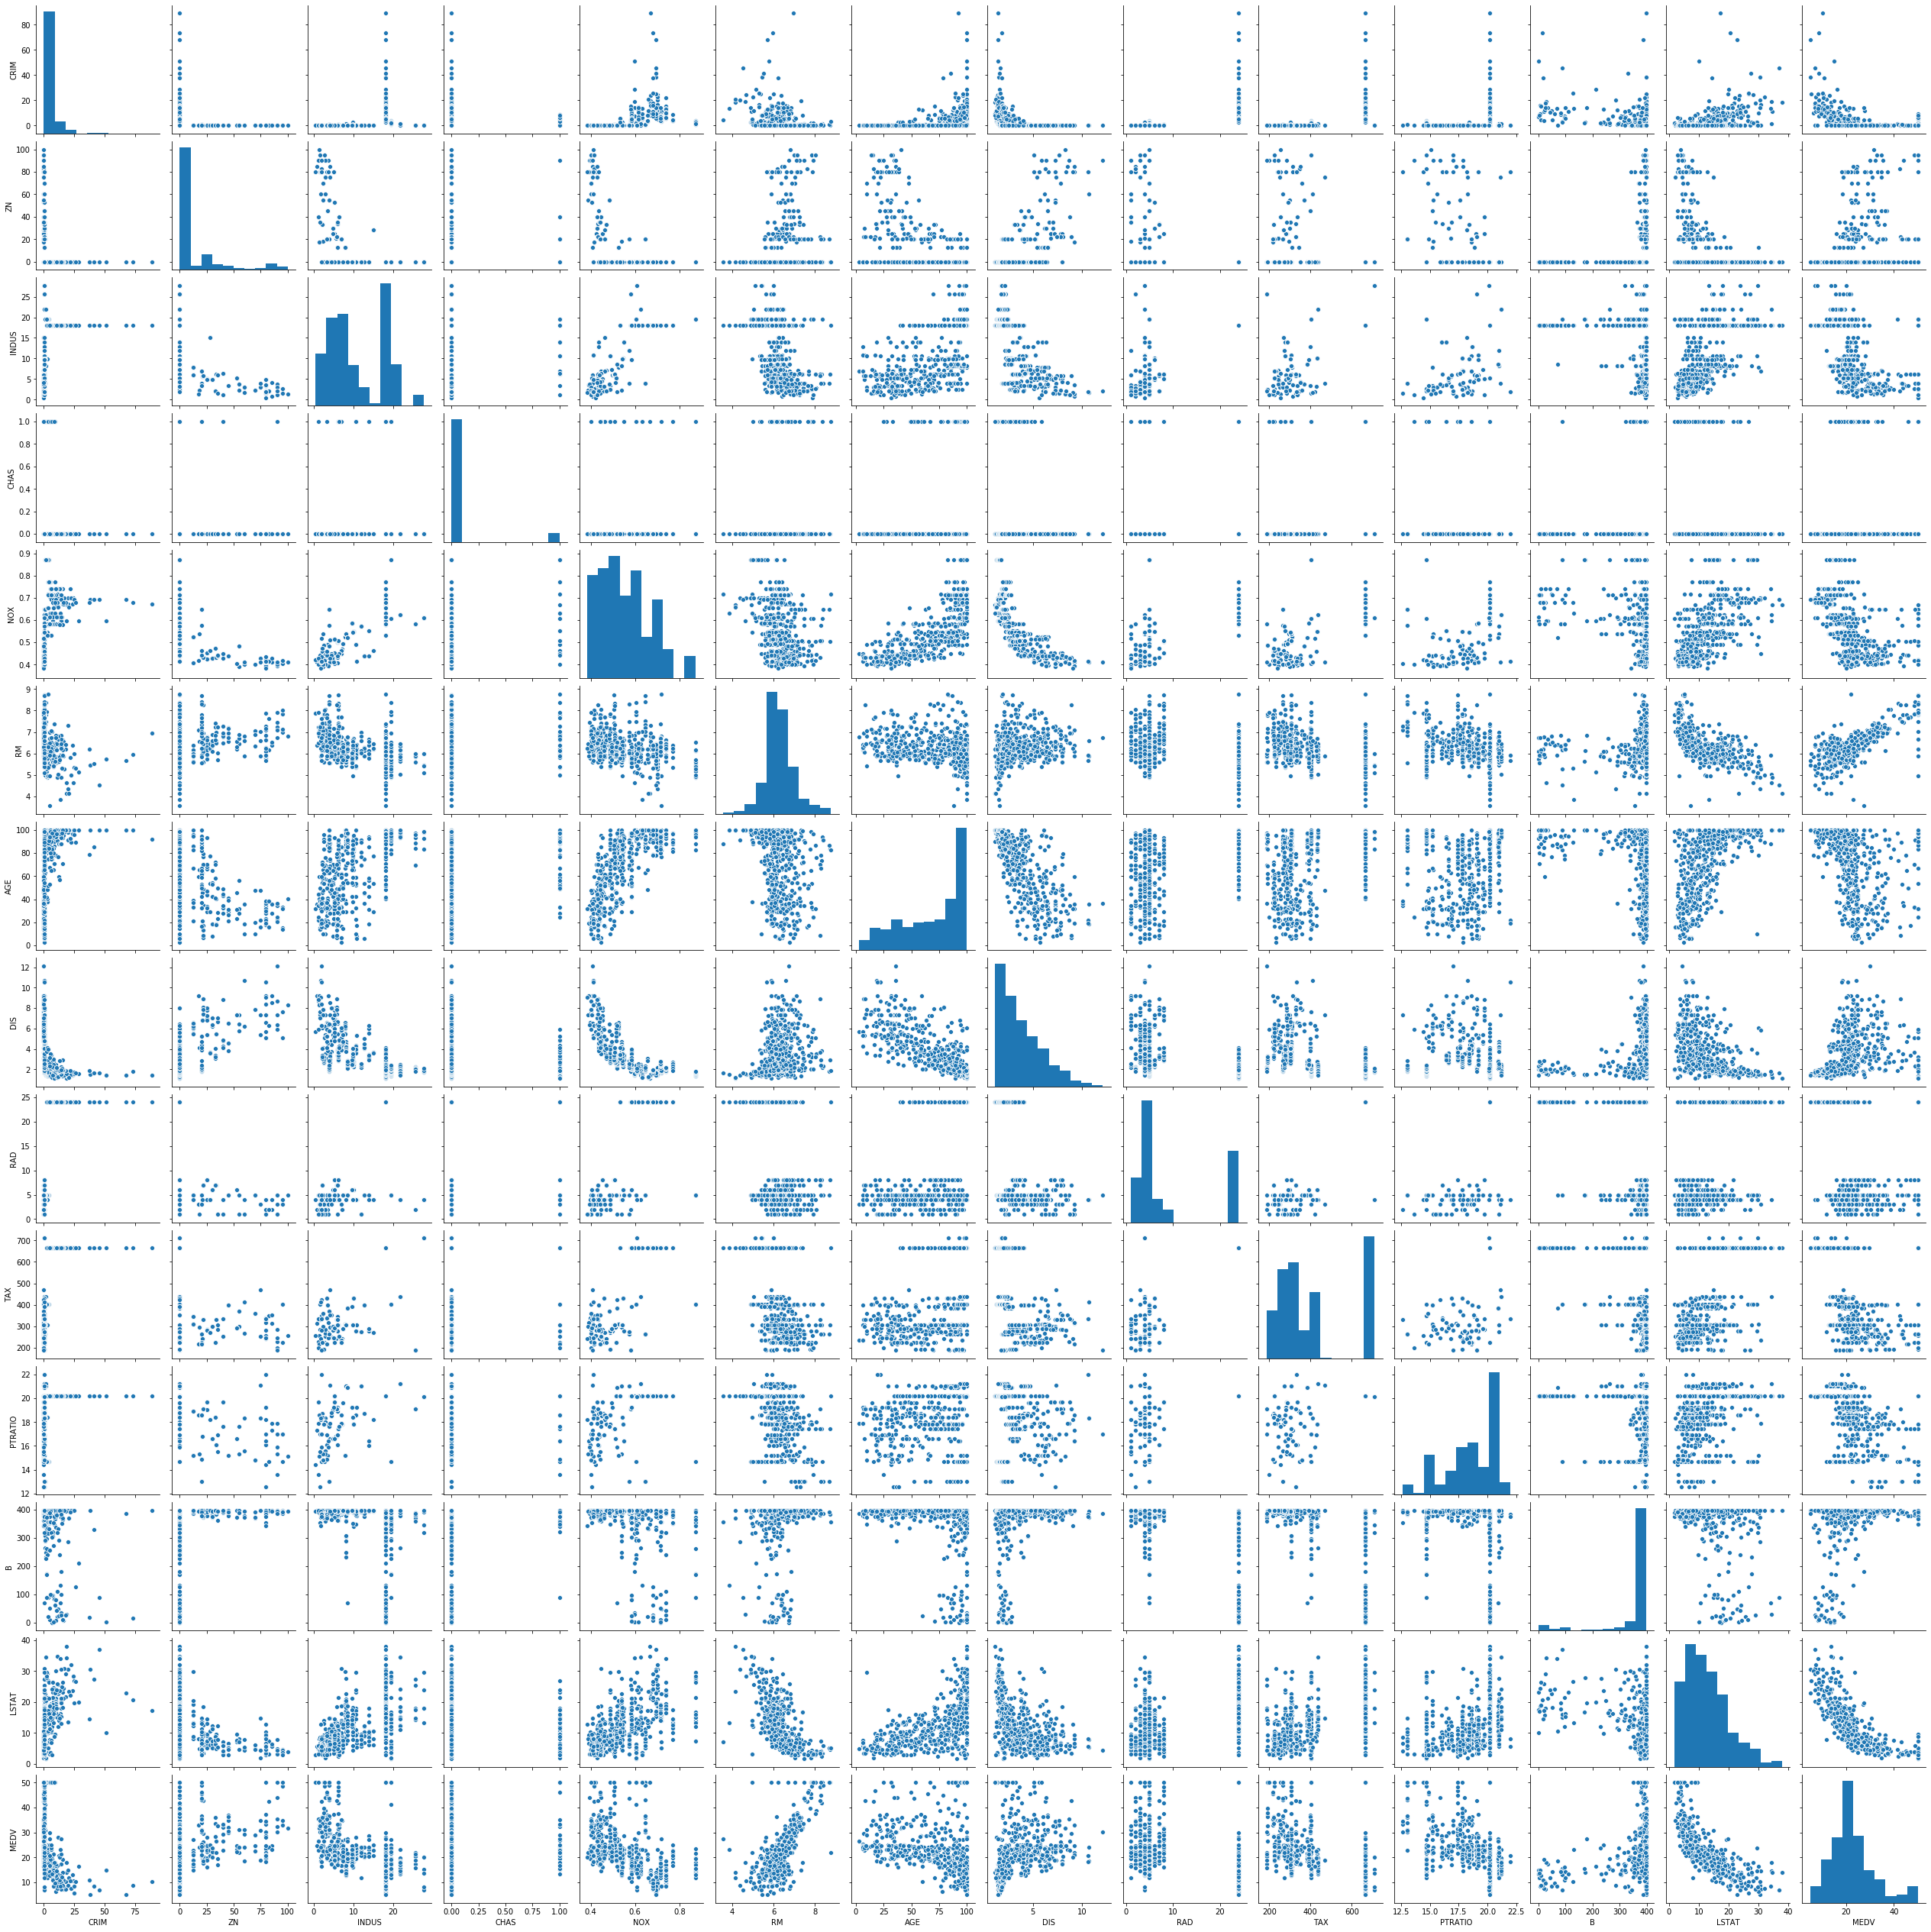

In [5]:
sns.pairplot(df_boston)

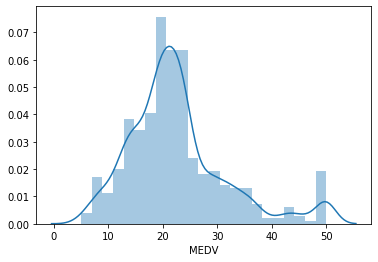

In [6]:
sns.distplot(df_boston['MEDV'])

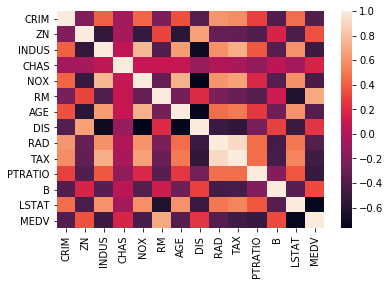

In [7]:
sns.heatmap(df_boston.corr())

In [8]:
X = pd.DataFrame(np.c_[df_boston['LSTAT']], columns = ['LSTAT'])
y = df_boston['MEDV']

In [9]:
np.shape(df_boston['LSTAT'])

(506,)

In [10]:
np.shape(np.c_[df_boston['LSTAT']])

(506, 1)

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de pruebas

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2019)

## Creando los modelos

In [12]:
lr = LinearRegression()
lr1 = LinearRegression()
lr2 = LinearRegression()

### Modelo Lineal

In [13]:
lr = lr.fit(X_train, y_train)

In [14]:
lr_pred = lr.predict(X_test)

linear_r2 = r2_score(y_test, lr_pred)
linear_r2

0.5387495541301137

In [15]:
print(lr.intercept_)

35.3675553512179


### Modelo Cuadrático

In [16]:
quadratic = PolynomialFeatures(degree=2)

In [17]:
X_quad = quadratic.fit_transform(X_train)

In [18]:
pr_quad = lr1.fit(X_quad, y_train)

In [19]:
pr_quad_pred = pr_quad.predict(quadratic.fit_transform(X_test))

quadratic_r2 = r2_score(y_test, pr_quad_pred)
quadratic_r2

0.6249460055368756

In [20]:
print(pr_quad.intercept_)

44.37353534525711


### Modelo Cúbico

In [21]:
cubic = PolynomialFeatures(degree=3)

In [22]:
X_cubic = cubic.fit_transform(X_train)

In [23]:
pr_cubic = lr2.fit(X_cubic, y_train)

In [24]:
pr_cubic_pred = pr_cubic.predict(cubic.fit_transform(X_test))

cubic_r2 = r2_score(y_test, pr_cubic_pred)
cubic_r2

0.6592992766576145

In [25]:
print(pr_cubic.intercept_)

49.63165763207688


Como podemos observar el valor de R cuadrado es mayor en el modelo cúbico

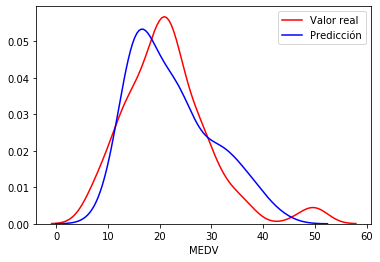

In [26]:
#Evaluemos los resultados del modelo cúbico
ax1 = sns.distplot(y_test, hist=False, color="r", label="Valor real")
sns.distplot(pr_cubic_pred, hist=False, color="b", label="Predicción" , ax=ax1)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pr_cubic_pred))
print('MSE:', metrics.mean_squared_error(y_test, pr_cubic_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pr_cubic_pred)))

MAE: 3.813846378253311
MSE: 23.97604290605164
RMSE: 4.896533764414541


## Visualización:

In [28]:
X_plot = np.linspace(2, 40, 50).reshape(-1, 1)
lr_pred1 = lr.predict(X_plot)
pr_quad_pred1 = pr_quad.predict(quadratic.fit_transform(X_plot))
pr_cubic_pred1 = pr_cubic.predict(cubic.fit_transform(X_plot))

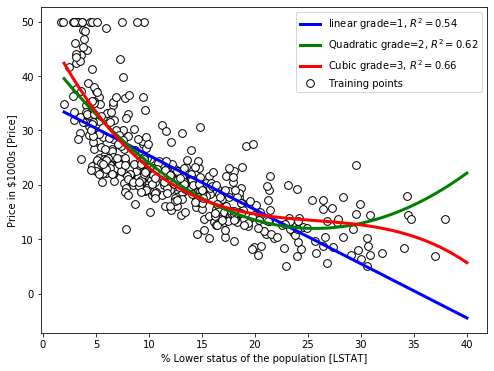

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Training points', color='white', edgecolor='black', s=60)
plt.plot(X_plot, lr_pred1, label='linear grade=1, $R^2=%.2f$' % linear_r2, color='blue', lw=3, linestyle='-')
plt.plot(X_plot, pr_quad_pred1, label='Quadratic grade=2, $R^2=%.2f$' % quadratic_r2,
        color='green', lw=3, linestyle='-')
plt.plot(X_plot, pr_cubic_pred1, label='Cubic grade=3, $R^2=%.2f$' % cubic_r2,
        color='red', lw=3, linestyle='-')

plt.xlabel('% Lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [Price]')
plt.legend(loc='best',fancybox=True)

## Referencia:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html